In [20]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
%matplotlib widget

In [21]:
pathToData = "/home/alan/Documents/LAB/CSHL/"

In [22]:
folders = glob(pathToData+"*/*")
folders

['/home/alan/Documents/LAB/CSHL/Data/Cav',
 '/home/alan/Documents/LAB/CSHL/Data/Kv',
 '/home/alan/Documents/LAB/CSHL/Data/Nav',
 '/home/alan/Documents/LAB/CSHL/doc/Fig_Cav',
 '/home/alan/Documents/LAB/CSHL/doc/Vehicle Use Policy.pdf',
 '/home/alan/Documents/LAB/CSHL/doc/electronics_for_electrophysiologists.pdf',
 '/home/alan/Documents/LAB/CSHL/doc/Fig_Nav',
 '/home/alan/Documents/LAB/CSHL/doc/ION_e-LabBook_2024.pdf',
 '/home/alan/Documents/LAB/CSHL/doc/Fig_Kv']

In [23]:
files = glob(folders[0]+"/*.abf")
files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0017.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0014.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0015.abf']

In [24]:
protocol = []
for f in files:
    rec = pyabf.ABF(f)
    protocol.append(rec.protocol)
protocol

['Ca Steady State Inactivation X-TREME',
 'Ca Steady State Inactivation',
 'Ca IV curve list',
 'Ca Ramp',
 'Ca IV curve list']

In [17]:
rec.

SyntaxError: invalid syntax (1485443543.py, line 1)

In [25]:
f = files[0]
rec = pyabf.ABF(f)
rec

ABF (v2.9) with 2 channels (pA, mV), sampled at 50.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.97 minutes, recorded with protocol "Ca Steady State Inactivation X-TREME". path=/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf

In [26]:
rec.headerText

'\nABF Class Methods\nabf.getAllXs()\nabf.getAllYs()\nabf.launchInClampFit()\nabf.saveABF1()\nabf.setSweep()\nabf.sweepD()\n\nABF Class Variables\nabfDateTime = 2024-06-10 18:00:38.711000\nabfDateTimeString = 2024-06-10T18:00:38.711\nabfFileComment =\nabfFilePath = /home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf\nabfFolderPath = /home/alan/Documents/LAB/CSHL/Data/Cav\nabfID = 2024_06_10_0018\nabfVersion = {\'major\': 2, \'minor\': 9, \'bugfix\': 0, \'build\': 0}\nabfVersionString = 2.9.0.0\nadcNames = [\'Im_scaled\', \'10_Vm\']\nadcUnits = [\'pA\', \'mV\']\nchannelCount = 2\nchannelList = [0, 1]\ncreator = Clampex 11.2.2.17\ncreatorVersion = {\'major\': 11, \'minor\': 2, \'bugfix\': 2, \'build\': 17}\ncreatorVersionString = 11.2.2.17\ndacNames = [\'V_clamp\', \'Cmd 1\']\ndacUnits = [\'mV\', \'mV\']\ndata = [[-186.5845 -186.3403 -186.0351 ...  -40.6494  -40.5884  -40.3442]\n[-119.873  -119.873  -119.873  ...  -29.9683  -29.9377  -29.9377]]\ndataByteStart = 19968\ndataLengthMi

In [6]:
rec.data.shape

(2, 400000)

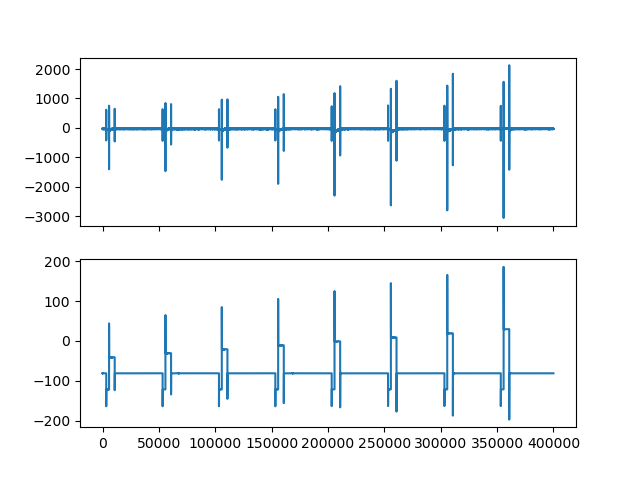

In [7]:
fullData = rec.data
fig,ax = plt.subplots(2,sharex=True)
ax[0].plot(fullData[0])
ax[1].plot(fullData[1])

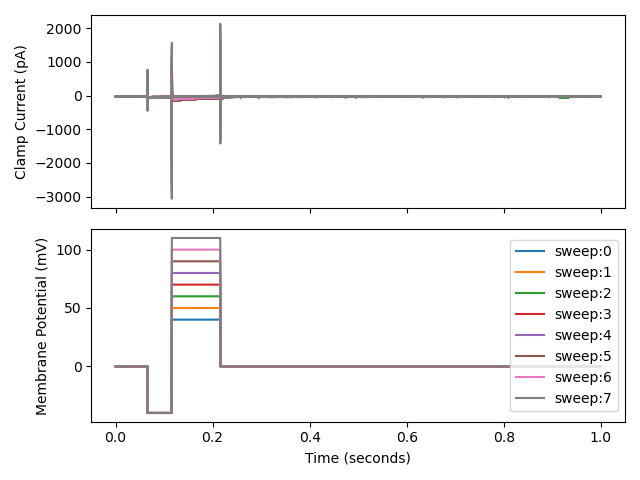

In [8]:
fig,ax = plt.subplots(2,sharex=True)
for swpNB in rec.sweepList:
    rec.setSweep(swpNB)
    ax[0].plot(rec.sweepX,rec.sweepY)
    ax[1].plot(rec.sweepX,rec.sweepC,label=f"sweep:{swpNB}")
# labels and legends
ax[1].set_xlabel(rec.sweepLabelX)
ax[0].set_ylabel(rec.sweepLabelY)
ax[1].set_ylabel(rec.sweepLabelC)
ax[1].legend(loc="right")
fig.tight_layout()

In [9]:
def plot_swps(file,legend=False):
    rec = pyabf.ABF(f)
    fig,ax = plt.subplots(2,sharex=True)
    for swpNB in rec.sweepList:
        rec.setSweep(swpNB)
        ax[0].plot(rec.sweepX,rec.sweepY)
        ax[1].plot(rec.sweepX,rec.sweepC,label=f"sweep:{swpNB}")
    # labels and legends
    ax[1].set_xlabel(rec.sweepLabelX)
    ax[0].set_ylabel(rec.sweepLabelY)
    ax[1].set_ylabel(rec.sweepLabelC)
    if legend:
        ax[1].legend(loc="right")
    fig.tight_layout()

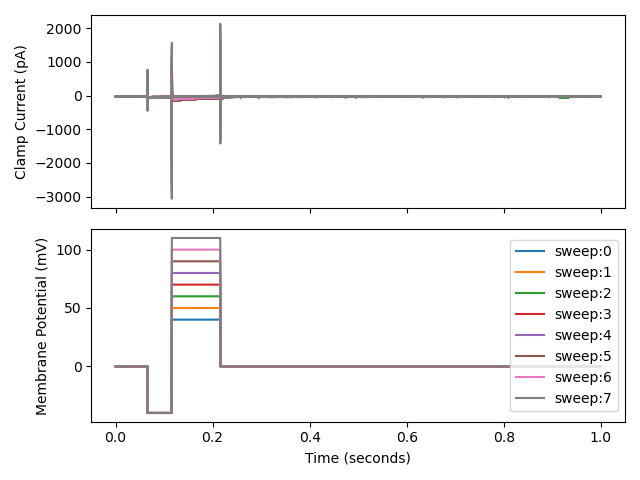

In [12]:
plot_swps(f,legend=True)

### Extract the raw data we want

In [21]:
rec = pyabf.ABF(f)
swps = []
for swpNB in rec.sweepList:
    rec.setSweep(swpNB)
    swps.append((rec.sweepY,rec.sweepC))
swps = np.array(swps)
swp_time = rec.sweepX

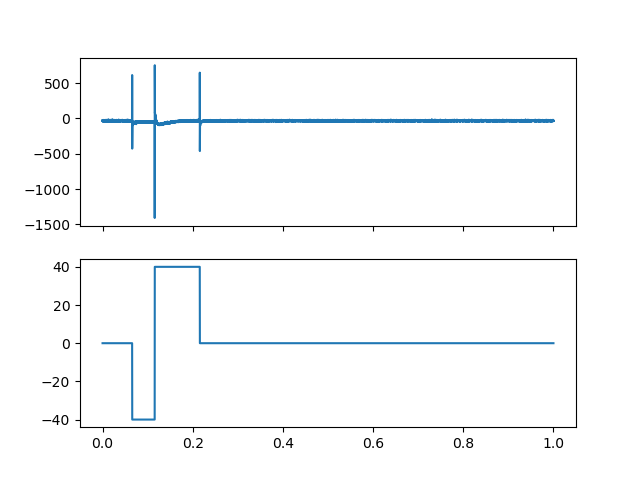

In [23]:
plt.close("all")
fig,ax = plt.subplots(2,sharex=True)
ax[0].plot(swp_time,swps[0,0])
ax[1].plot(swp_time,swps[0,1])

In [31]:
dt = swp_time[1]
sampling_rate = 1/dt
print(f'sampling_period = {dt}')
print(f'sampling_rate = {sampling_rate}')

sampling_period = 2e-05
sampling_rate = 49999.99999999999


49999.99999999999

In [32]:
def get_sweeps(f):
    rec = pyabf.ABF(f)
    swps = []
    for swpNB in rec.sweepList:
        rec.setSweep(swpNB)
        swps.append((rec.sweepY,rec.sweepC))
    swps = np.array(swps)
    swp_time = rec.sweepX
    dt = swp_time[1] 
    return swps, swp_time, 1/dt

In [35]:
swps, time, sr = get_sweeps(f)
print(f'All sweeps numpy array shape : {swps.shape}')
print(f'time array shape : {swp_time.shape}')
print(f'Sampling rate = {sr} Hz')

All sweeps numpy array shape : (8, 2, 50000)
time array shape : (50000,)
Sampling rate = 49999.99999999999 Hz


### Lets cut and extract parts of recording that we are interested in :

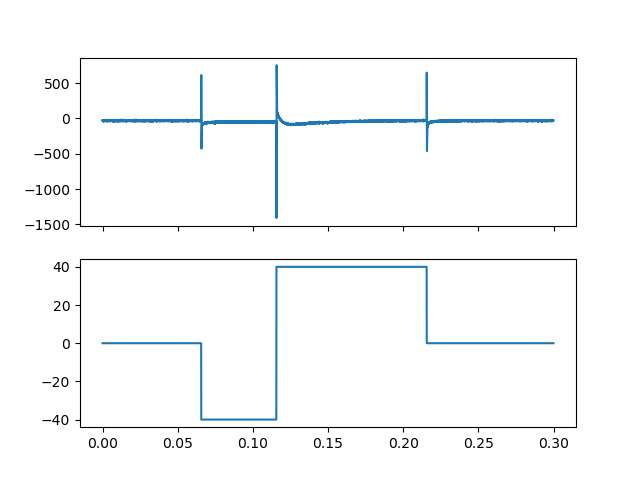

In [38]:
swpY0 = swps[0,0]
swpC0 = swps[0,1]
start = 0 # in seconds
end = 0.3
i_start = int(start * sr)
i_end = int(end * sr)
fig,ax = plt.subplots(2,sharex=True)
cutY = swpY0[i_start:i_end]
cutC = swpC0[i_start:i_end]
cutTime = swp_time[i_start:i_end]
ax[0].plot(cutTime,cutY)
ax[1].plot(cutTime,cutC)